This is a notebook detailing as to how we can get insights from the review ratings and the most used words in the listing description. Having this information we can be in a position to improve the Search Engine Optimization(SEO) of the Airbnb platform to target people using these keywords present in the description and reviews of the place that the potential customer might be interested in.

    In this notebook we will be developing a model using the NLTK library. The notebook contains different Sections..they are the Data Preparation, Data Cleaning and Exploratory Data Analysis and the next section is the Model Preparation and Model Building .
    Fianlly we will be building a WordCloud Model containing all the most important stopwords that have been extracted based on the relevance that they have as detected by the model.

In [2]:
!pip install wordcloud

In [3]:
#Importing all the libraries
import pandas as pd
import requests
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import nltk
from nltk.corpus import stopwords
from sklearn.tree import DecisionTreeRegressor
import re 
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from wordcloud import WordCloud
%matplotlib inline

In [4]:
#Importing the dataset
listings_file_name = 'listings.csv.gz'

#Conveting the dataset into a Dataframe after being decompressed.
listings = pd.read_csv(listings_file_name, compression = "gzip", low_memory = False)
pd.set_option('display.max_columns', len(listings.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,20190710134553,2019-07-11,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,business,Finsbury Park is a friendly melting pot commun...,For art lovers I can give guest my Tate Member...,The flat only a 10 minute walk to Finsbury Par...,Guest will have access to the self catering ki...,I like to have little chats with my guest over...,I'm an artist and have my artwork up on the wa...,NaN,NaN,https://a0.muscache.com/im/pictures/ffb507b7-9...,NaN,54730,https://www.airbnb.com/users/show/54730,Alina,2009-11-16,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,86%,NaN,f,https://a0.muscache.com/im/users/54730/profile...,https://a0.muscache.com/im/users/54730/profile...,LB of Islington,4.0,4.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Islington, Greater London, United Kingdom",LB of Islington,Islington,NaN,Islington,Greater London,N4 3,London,"Islington, United Kingdom",GB,United Kingdom,51.56802,-0.11121,t,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",538.0,$65.00,$333.00,"$1,176.00",$100.00,$15.00,1,$15.00,1,29,1,1,29,29,1.0,29.0,2 months ago,t,19,42,72,347,2019-07-11,16,2,2010-08-18,2019-06-10,96.0,9.0,10.0,9.0,10.0,9.0,9.0,f,NaN,NaN,f,f,moderate,f,f,3,1,2,0,0.15
1,15400,https://www.airbnb.com/rooms/15400,20190710134553,2019-07-11,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,Bright Chelsea Apartment This is a bright one...,Lots of windows and light. St Luke's Gardens ...,romantic,It is Chelsea.,The building next door is in the process of be...,The underground stations are South Kensington ...,There are two wardrobes for guests exclusive u...,If I am in the country I like to welcome my gu...,NO SMOKING PLEASE.. No unauthorised guests. No...,NaN,NaN,https://a0.muscache.com/im/pictures/428392/462...,NaN,60302,https://www.airbnb.com/users/show/60302,Philippa,2009-12-05,"Kensington, England, United Kingdom","English, grandmother, I have travelled quite ...",within a day,100%,NaN,t,https://a0.muscache.com/i

In [5]:
listings.shape   #Visualizing the dimensions of the dataset.

(83850, 106)

In [6]:
print(listings.columns)   #Identifying all the columns in the dataset.

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)


DATA UNDERSTANDING, CLEANING AND PREPARATION.

The first thing to do with regards to the columsn in the dataset is to get rid of any listings that haven't been reviewed yet with the presumption being that these may not have any historical data. 

In [7]:
listings.dropna(subset=['first_review'], inplace=True)
listings.drop(columns=['first_review'], inplace= True)

If a listings hasn't been reviewed then there will be missing information that we can use to model the data and therefore these have been excluded.

In [8]:
#Identifying the proportion of nulls in the columns
listings.isnull().mean()[listings.isnull().mean()>0].sort_values(ascending=False)

medium_url                      1.000000
thumbnail_url                   1.000000
xl_picture_url                  1.000000
host_acceptance_rate            1.000000
neighbourhood_group_cleansed    1.000000
jurisdiction_names              0.999984
license                         0.998185
square_feet                     0.994525
monthly_price                   0.926608
weekly_price                    0.900345
notes                           0.561829
host_about                      0.385312
house_rules                     0.374123
access                          0.373231
interaction                     0.365209
neighborhood_overview           0.310344
transit                         0.310090
security_deposit                0.301638
space                           0.253076
host_response_time              0.241266
host_response_rate              0.241266
host_neighbourhood              0.219921
state                           0.198402
cleaning_fee                    0.198354
summary         

Having identified all the columns contents we can identify a few columns to drop either because they have no bearing to the model or are represented elsewhere or are empty.

In [9]:
dropcols = ['id', 'scrape_id', 'last_scraped', 'experiences_offered', 'host_id', 
           'host_name', 'host_neighbourhood', 'neighbourhood', 'neighbourhood_group_cleansed', 
           'country_code', 'country', 'has_availability', 'calendar_last_scraped', 'license', 
           'jurisdiction_names', 'square_feet', 'weekly_price', 'monthly_price', 'host_location',
           'calendar_updated', 'last_review','host_acceptance_rate']
listings.drop(columns=dropcols, inplace=True)

Columns are dropped because they are redundant for E.g 'id' are represented elsewhere or have an unacceptable amount of info missing like 'jurisdiction names'. 

In [10]:
listings.shape

(62827, 83)

In [11]:
listings.drop(columns=list(x for x in listings.columns if 'url' in x), inplace=True)

In [12]:
#Taking a look at the object columns
obj_cols = listings.select_dtypes(include='object')
obj_cols

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,city,state,zipcode,market,smart_location,is_location_exact,property_type,room_type,bed_type,amenities,price,security_deposit,cleaning_fee,extra_people,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,For art lovers I can give guest my Tate Member...,The flat only a 10 minute walk to Finsbury Par...,Guest will have access to the self catering ki...,I like to have little chats with my guest over...,I'm an artist and have my artwork up on the wa...,2009-11-16,I am a Multi-Media Visual Artist and Creative ...,within a few hours,86%,f,"['email', 'phone', 'facebook', 'reviews']",t,f,"Islington, Greater London, United Kingdom",Islington,Islington,Greater London,N4 3,London,"Islington, United Kingdom",t,Apartment,Private room,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",$65.00,$100.00,$15.00,$15.00,f,f,f,moderate,f,f
1,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,Bright Chelsea Apartment This is a bright one...,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,The building next door is in the process of be...,The underground stations are South Kensington ...,There are two wardrobes for guests exclusive u...,If I am in the country I like to welcome my gu...,NO SMOKING PLEASE.. No unauthorised guests. No...,2009-12-05,"English, grandmother, I have travelled quite ...",within a day,100%,t,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"London, United Kingdom",Kensington and Chelsea,London,NaN,SW3,London,"London, United Kingdom",t,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$100.00,$150.00,$50.00,$0.00,f,f,f,strict_14_with_grace_period,t,t
2,Superb 3-Bed/2 Bath & Wifi: Trendy W1,"Open from June 2018 after a 3-year break, we a...",Ready again from June 2018 for bookings after ...,"Open from June 2018 after a 3-year break, we a...","Location, location, location! You won't find b...",This property has new flooring throughout. Gue...,You can walk to tourist London or take numerou...,Full use of whole independent apartment,"Always available by email or phone (before, du...",The apartment benefits from new flooring throu...,2010-01-04,We are Liz and Jack. We manage a number of ho...,within an hour,85%,t,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"London, Fitzrovia, United Kingdom",Westminster,London,Fitzrovia,W1T4BP,London,"London, United Kingdom",t,Apartment,Entire home/apt,Real Bed,"{TV,Wifi,Kitchen,""Paid parking off premises"",E...",$300.00,$350.00,$65.00,$10.00,f,t,f,strict_14_with_grace_period,f,f
3,Battersea bedroom & office w parking shared ga...,"Artist house, bright high ceiling rooms, priva...",- End of terrace two bedroom house close to So...,"Artist house, bright high ceiling rooms, priva...","- Battersea is a quiet family area, easy acces...",- Please have a profile or tell us more about ...,"- 5 mins walk to Battersea Park, 15 mins walk ...",- there is a communal garden in our complex - ...,We rent out our house only when we are away. T...,A house manual will be emailed once a booking ...,2009-09-28,"I've been using Airbnb for a while now, both a...",within a day,100%,f,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"London, United Kingdom",Wandsworth,London,NaN,SW11 5GX,London,"London, United Kingdom",t,Townhouse,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par..."

There still exists a number of columns that that contain free text and so we will be dropping them.

In [13]:
free_text = ['name', 'summary', 'space', 'description', 'neighborhood_overview', 
             'notes', 'transit', 'access', 'interaction', 'house_rules', 'host_about']

#saving the data in a seperate df in case we want to investigate later
textdf = listings.copy()[free_text]

listings.drop(columns=free_text, inplace=True)

In [14]:
#Taking a look at the data that is currently left so that we can convert as many of them into numeric format for prediction purposes.
listings.select_dtypes(include='object')

,host_since,host_response_time,host_response_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,city,state,zipcode,market,smart_location,is_location_exact,property_type,room_type,bed_type,amenities,price,security_deposit,cleaning_fee,extra_people,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,2009-11-16,within a few hours,86%,f,"['email', 'phone', 'facebook', 'reviews']",t,f,"Islington, Greater London, United Kingdom",Islington,Islington,Greater London,N4 3,London,"Islington, United Kingdom",t,Apartment,Private room,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",$65.00,$100.00,$15.00,$15.00,f,f,f,moderate,f,f
1,2009-12-05,within a day,100%,t,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"London, United Kingdom",Kensington and Chelsea,London,NaN,SW3,London,"London, United Kingdom",t,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$100.00,$150.00,$50.00,$0.00,f,f,f,strict_14_with_grace_period,t,t
2,2010-01-04,within an hour,85%,t,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"London, Fitzrovia, United Kingdom",Westminster,London,Fitzrovia,W1T4BP,London,"London, United Kingdom",t,Apartment,Entire home/apt,Real Bed,"{TV,Wifi,Kitchen,""Paid parking off premises"",E...",$300.00,$350.00,$65.00,$10.00,f,t,f,strict_14_with_grace_period,f,f
3,2009-09-28,within a day,100%,f,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"London, United Kingdom",Wandsworth,London,NaN,SW11 5GX,London,"London, United Kingdom",t,Townhouse,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",$175.00,$250.00,$70.00,$0.00,f,f,f,moderate,t,t
4,2010-04-03,within a few hours,100%,f,"['email', 'phone', 'reviews']",t,f,"Wimbledon, London, United Kingdom",Wandsworth,Wimbledon,London,SW19 6QH,London,"Wimbledon, United Kingdom",t,Apartment,Entire home/apt,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",El...",$65.00,$250.00,$50.00,$11.00,f,f,f,moderate,f,f
5,2010-04-05,within a few hours,70%,t,"['email', 'phone', 'reviews', 'offline_governm...",t,f,"Barnet, England, United Kingdom",Barnet,Barnet,England,NW11 9,London,"Barnet, United Kingdom",t,House,Private room,Real Bed,"{Wifi,Kitchen,""Buzzer/wireless intercom"",Heati...",$29.00,$100.00,$0.00,$8.00,f,t,f,strict_14_with_grace_period,f,f
6,2010-04-19,within an hour,100%,f,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Islington, England, United Kingdom",Islington,Islington,England,N1 2,London,"Islington, United Kingdom",t,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",$147.00,$100.00,$75.00,$15.00,f,t,f,strict_14_with_grace_period,f,f
7,2010-04-19,within an hour,100%,f,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Islington, England, United Kingdom",Islington,Islington,England,N1 2,London,"Islington, United Kingdom",t,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",$147.00,$100.00,$75.00,$10.00,f,t,f,strict_14_with_grace_period,f,f
8,2010-05-29,within a few hours,100%,t,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"London, United Kingdom",Newham,London,NaN,E13 0QF,London,"London, United Kingdom",t,Townhouse,Private room,Real Bed,"{TV,Wifi,Kitchen,""Paid parking off premises"",B...",$34.00,NaN,$10.00,$12.00,f,f,f,strict_14_with_grace_period,t,t
9,2010-06-14,within an hour,100%,f,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Twickenham, England, United Kingdom",Hounslow,Twickenham,England,TW7 7HG,London,"Twickenham, United Kingdom",t,House,Private room,Real Bed,"{Wifi,Kitchen,""Pets live on this property"",Cat...",$100.00,NaN,NaN,$0.00,f,f,f,flexible,f,f


In [15]:
#The location data will be restricted to the cleansed neighbourhood and potentially the postcode
location =  ['street', 'city', 'state', 'market', 'smart_location', 'longitude', 'latitude']
listings.drop(columns=location, inplace=True)

The following columns are not needed in terms of their granularity

In [16]:
#We will now be removing the '$' sign from the price field
cols=['price','cleaning_fee','extra_people','security_deposit']
listings[cols]=listings[cols].replace('[\$,]', '', regex=True).astype(float)

In [17]:
#Removing the % from host response
cols=['host_response_rate']
listings[cols]=listings[cols].replace('[\%,]', '', regex=True).astype(float)

In [18]:
listings.shape

(62827, 57)

In [19]:
#Checking the nulls present in the columns
listings.isnull().mean()[listings.isnull().mean()>0].sort_values(ascending=False)

security_deposit               0.301638
host_response_time             0.241266
host_response_rate             0.241266
cleaning_fee                   0.198354
review_scores_checkin          0.028204
review_scores_value            0.028189
review_scores_location         0.028189
review_scores_accuracy         0.027361
review_scores_communication    0.027313
review_scores_cleanliness      0.027186
review_scores_rating           0.026549
zipcode                        0.023318
bathrooms                      0.000621
beds                           0.000605
host_listings_count            0.000509
host_is_superhost              0.000509
host_since                     0.000509
host_total_listings_count      0.000509
host_has_profile_pic           0.000509
host_identity_verified         0.000509
bedrooms                       0.000382
dtype: float64

In [20]:
#Before dealing with the remaining nulls we can eliminate the static cols
static_cols = [c for c in listings.columns if len(listings[c].unique()) == 1 ]
listings.drop(columns=static_cols, inplace=True)

In [21]:
static_cols

['is_business_travel_ready']

Static Columns are the columns with only one value and will not affect any of the modelling as they are represented by a single value and therefore have been dropped.

In [22]:
#Further investigating the object fields.
def gen_dd(df):
    '''for a given dataframe will return details of object columns
    
    Input - Dataframe
    
    Function - Constructs a data dictionary For each object data type column 
    Returns - dataframe format Column, Count of unique values, an example value 
    '''
    colarray = []
    lenarray = []
    valarray = []
    for x in df.select_dtypes(include='object').columns:
        colarray.append(x)
        lenarray.append(len(df[x].unique()))
        valarray.append(df[x].unique()[0])

    data_dict = pd.DataFrame(
        {'Column': colarray,
         'Unique': lenarray,
         'Example': valarray
        })
    return data_dict

#Thus, can infer that if has 3 unique values and id "t" or "f" then there is a lurking NULL. t
#and this will need to be dealt with before I can turn the true false into proper bool
data_dict = gen_dd(listings)
data_dict

,Column,Unique,Example
0,host_since,3307,2009-11-16
1,host_response_time,5,within a few hours
2,host_is_superhost,3,f
3,host_verifications,514,"['email', 'phone', 'facebook', 'reviews']"
4,host_has_profile_pic,3,t
5,host_identity_verified,3,f
6,neighbourhood_cleansed,33,Islington
7,zipcode,27672,N4 3
8,is_location_exact,2,t
9,property_type,37,Apartment


Thus, we will now replace 't' and 'f' with 1 and 0 that will turn the object field into a bool field.

In [23]:
listings.replace({'t':1, 'f':0}, inplace=True)

In [24]:
listings['host_is_superhost'].isnull().sum()

32

In [25]:
#further investigating the object fields 
data_dict = gen_dd(listings)
data_dict

,Column,Unique,Example
0,host_since,3307,2009-11-16
1,host_response_time,5,within a few hours
2,host_verifications,514,"['email', 'phone', 'facebook', 'reviews']"
3,neighbourhood_cleansed,33,Islington
4,zipcode,27672,N4 3
5,property_type,37,Apartment
6,room_type,3,Private room
7,bed_type,5,Real Bed
8,amenities,57594,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ..."
9,cancellation_policy,6,moderate


In [26]:
#host_since will turn to date and the difference will be taken with the years.
listings.host_since = pd.to_datetime(listings.host_since).apply(lambda x: 2018 - x.year)

In [27]:
#Grouping the zips column
listings['zipcode'].isnull().mean()

0.02331800022283413

In [28]:
listings.dropna(subset=['zipcode'], inplace=True)
#Less than 3% of thr nulls are ok to drop

In [29]:
def zip_clean(x):
    '''function takes a zipcode x and returns the first 2 letters
    designed to be applied using .apply element wise down zipcode of the dataframe
    
    input - x - indivdual row record for zip
    output - returns only letters, the first two, and upper case
    '''
    regex = re.compile('[^a-zA-Z]')
 
    return regex.sub('', x[:2]).upper().strip()
   

listings['new_zip'] = listings['zipcode'].apply(zip_clean)
listings.drop(columns=['zipcode'], inplace=True)

In [30]:
listings[listings['new_zip']=='']

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,new_zip
8329,3.0,within a few hours,100.0,1.0,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1.0,1.0,Harrow,1,Condominium,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free parking on pre...",35.0,NaN,NaN,1,0.0,1,3,1,1,3,3,1.0,3.0,17,45,68,340,8,6,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,flexible,0,0,1,0,1,0,0.16,
26547,2.0,NaN,NaN,0.0,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",1.0,1.0,Tower Hamlets,0,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Pets allowed...",32.0,NaN,15.0,1,0.0,2,14,2,2,14,14,2.0,14.0,0,0,0,0,35,0,95.0,10.0,9.0,10.0,10.0,9.0,10.0,0,1,moderate,0,0,1,0,1,0,1.27,
28720,1.0,NaN,NaN,0.0,1.0,1.0,"['email', 'phone', 'google', 'reviews', 'jumio...",1.0,1.0,Tower Hamlets,0,Apartment,Entire home/apt,5,2.0,3.0,4.0,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""S...",280.0,NaN,NaN,1,0.0,5,1125,5,5,1125,1125,5.0,1125.0,29,59,89,179,1,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,flexible,0,0,1,1,0,0,0.04,
64863,0.0,within an hour,100.0,0.0,1.0,1.0,"['email', 'phone']",1.0,0.0,Southwark,0,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Washer,Essentials,Shampoo}",24.0,NaN,NaN,1,15.0,1,1125,1,1,1125,1125,1.0,1125.0,27,52,52,249,5,5,84.0,8.0,8.0,10.0,10.0,10.0,10.0,0,1,flexible,0,0,1,0,1,0,1.18,


In [31]:
listings['new_zip'].value_counts()

SW    11498
E     11224
W      9824
SE     8024
N      7023
NW     5810
WC     1581
EC     1309
TW     1064
HA      757
CR      650
UB      505
KT      439
IG      401
BR      343
RM      283
SM      246
EN      233
DA      123
TN       10
          4
WI        3
TF        1
NN        1
KI        1
RH        1
LA        1
HO        1
EI        1
SL        1
Name: new_zip, dtype: int64

In [32]:
#Eliminate under represented zips
zip_arr = listings['new_zip'].value_counts()[listings['new_zip'].value_counts()<10].index

listings = listings[~listings.new_zip.isin(zip_arr)]

By performing the above operation, it is possible that we may lose some values of the latitude and longitude, but for this purpose it can produce a clean output.

In [33]:
listings['new_zip'].value_counts()

SW    11498
E     11224
W      9824
SE     8024
N      7023
NW     5810
WC     1581
EC     1309
TW     1064
HA      757
CR      650
UB      505
KT      439
IG      401
BR      343
RM      283
SM      246
EN      233
DA      123
TN       10
Name: new_zip, dtype: int64

In [34]:
data_dict = gen_dd(listings)
data_dict

,Column,Unique,Example
0,host_response_time,5,within a few hours
1,host_verifications,512,"['email', 'phone', 'facebook', 'reviews']"
2,neighbourhood_cleansed,33,Islington
3,property_type,37,Apartment
4,room_type,3,Private room
5,bed_type,5,Real Bed
6,amenities,56290,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ..."
7,cancellation_policy,6,moderate
8,new_zip,20,N


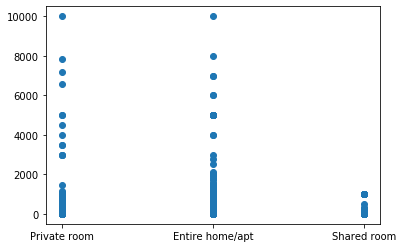

In [35]:
plt.scatter('room_type','price', data=listings)

As we can see, there is a clear order to room/type in terms of price and so I have opted to encode the data as ordinal rather than as dummies.

In [36]:
#Ameding the room type to ordinal
listings.replace({
                         'Entire home/apt': 3,
                         'Private room': 2,
                         'Shared room': 1}, inplace=True)

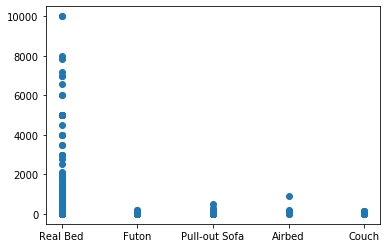

In [37]:
plt.scatter('bed_type','price', data=listings)

In [38]:
#Turning the bed type to bool
def real_bed(x):
    '''turns the bed type into real or not
    designed to be run .apply down df rows
    outputs 1 if bed is a real bed 0 if not
    '''
    if x == 'Real Bed':
        return 1
    else:
        return 0
listings['real_bed'] = listings['bed_type'].apply(real_bed)
listings.drop(columns='bed_type', inplace=True)

In [39]:
data_dict = gen_dd(listings)
data_dict

,Column,Unique,Example
0,host_response_time,5,within a few hours
1,host_verifications,512,"['email', 'phone', 'facebook', 'reviews']"
2,neighbourhood_cleansed,33,Islington
3,property_type,37,Apartment
4,amenities,56290,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ..."
5,cancellation_policy,6,moderate
6,new_zip,20,N


In [40]:
#Update host_response_time to ordinal and there is no need to visualize this data as the order is in descending.
listings.replace({'within an hour': 4,
                         'within a few hours': 3,
                         'within a day': 2,
                         'a few days or more': 1}, inplace=True)

In [41]:
data_dict = gen_dd(listings)
data_dict

,Column,Unique,Example
0,host_verifications,512,"['email', 'phone', 'facebook', 'reviews']"
1,neighbourhood_cleansed,33,Islington
2,property_type,37,Apartment
3,amenities,56290,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ..."
4,cancellation_policy,6,moderate
5,new_zip,20,N


In [42]:
listings['cancellation_policy'].unique()

array(['moderate', 'strict_14_with_grace_period', 'flexible',
       'super_strict_30', 'super_strict_60', 'strict'], dtype=object)

The above columns can be treated as they are time-based fields that er ordinal and so we can look at averages etc over the population.

In [43]:
listings.replace({'flexible': 6,
    'moderate' : 5,
    'strict_14_with_grace_period': 4,
                         'strict': 3,
                         'super_strict_30': 2,
                         'super_strict_60': 1}, inplace=True)

In [44]:
data_dict = gen_dd(listings)
data_dict

,Column,Unique,Example
0,host_verifications,512,"['email', 'phone', 'facebook', 'reviews']"
1,neighbourhood_cleansed,33,Islington
2,property_type,37,Apartment
3,amenities,56290,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ..."
4,new_zip,20,N


The remaining columns have no order but may highlight interesting trends and therefore will be converted to dummies as they have large numbers of unique fields so improvements may have to be made in grouping them.

In [45]:
#Turning host_verifications into dummies
veri_enc = listings.host_verifications.apply(eval) \
                                                            .str.join('|') \
                                                            .str.get_dummies()

In [46]:
#Truning amenities into dummies.
amen_enc = listings.amenities.str.strip('{}') \
                                         .str.replace('"','') \
                                         .str.split(',') \
                                         .str.join('|') \
                                         .str.get_dummies()

In [47]:
#Turning the rest of the columns into dummies
listings = pd.get_dummies(listings, columns=['neighbourhood_cleansed','property_type','new_zip'],drop_first=True)

In [48]:
listings.drop(columns=['host_verifications','amenities'], inplace=True)

In [49]:
listings.shape

(61347, 138)

In [50]:
listings.isnull().mean()[listings.isnull().mean()>0].sort_values(ascending=False)

security_deposit               0.302036
host_response_time             0.240419
host_response_rate             0.240419
cleaning_fee                   0.198624
review_scores_checkin          0.028168
review_scores_value            0.028151
review_scores_location         0.028151
review_scores_accuracy         0.027385
review_scores_communication    0.027320
review_scores_cleanliness      0.027222
review_scores_rating           0.026570
bathrooms                      0.000619
beds                           0.000587
host_listings_count            0.000489
host_is_superhost              0.000489
host_since                     0.000489
host_total_listings_count      0.000489
host_has_profile_pic           0.000489
host_identity_verified         0.000489
bedrooms                       0.000391
dtype: float64

In [51]:
#Dropping any value without a review rating
listings.dropna(subset=['review_scores_rating'], inplace=True)

Review Score rating is the overall review score for the listing. Dropping the values that are null is an essential field for this analysis.

In [52]:
#Function to print the null columns
def null_cols(df):
    '''prints the null cols and their %
    input data frame
    output column name and % missing if the column has any nulls missing
    
    '''
    print(df.isnull().mean()[df.isnull().mean()>0].sort_values(ascending=False))

In [53]:
null_cols(listings)

security_deposit               0.295377
host_response_time             0.232296
host_response_rate             0.232296
cleaning_fee                   0.191185
review_scores_checkin          0.001742
review_scores_value            0.001725
review_scores_location         0.001725
review_scores_accuracy         0.000938
review_scores_communication    0.000871
review_scores_cleanliness      0.000770
bathrooms                      0.000636
beds                           0.000603
host_listings_count            0.000469
host_is_superhost              0.000469
host_since                     0.000469
host_total_listings_count      0.000469
host_has_profile_pic           0.000469
host_identity_verified         0.000469
bedrooms                       0.000402
dtype: float64


In [54]:
#here at this point we can infer that all other nulls are to be zero
listings.fillna(0,inplace=True)

The remaining columns can be imputed with zero

In [55]:
null_cols(listings)

Series([], dtype: float64)


In [56]:
listings.to_csv('clean_listings.csv',index=None)

Now the data present in the dataset 'clean_listings' is a cleaned version of the original dataset and is now ready to be modelled and evaluated.

MODELLING AND EVALUATION

In [57]:
listings.corr()['price'].sort_values(ascending=False).head()

price           1.000000
accommodates    0.365602
bedrooms        0.329691
cleaning_fee    0.328577
beds            0.304025
Name: price, dtype: float64

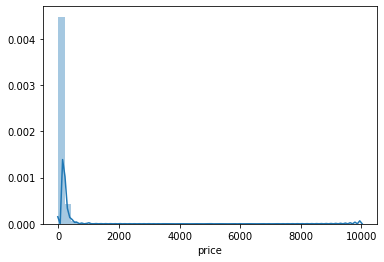

In [58]:
sns.distplot(listings['price'])

In [59]:
q = listings["price"].quantile(0.99)

# excluding price outliers
listings = listings[listings["price"] < q]

In [60]:
listings.shape

(59048, 138)

In [61]:
listings.to_csv('clean_listings.csv',index=None)

In [62]:
listings = pd.read_csv('clean_listings.csv')

In [63]:
listings.corr()['review_scores_rating'].sort_values(ascending=False).head()

review_scores_rating           1.000000
review_scores_accuracy         0.754164
review_scores_value            0.747241
review_scores_cleanliness      0.721348
review_scores_communication    0.656859
Name: review_scores_rating, dtype: float64

In [64]:
#There's a tendency for people to over exaggerate negative reviews so we will consider the negative reviews as low outliers and remove them from the reviews. 
for x in ['review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']:
    q = listings[x].quantile(0.01)
    listings = listings[listings[x] > q]

In [65]:
listings.shape

(48003, 138)

In [66]:
listings.corr()['price'].sort_values(ascending=False).head(10)

price                                 1.000000
accommodates                          0.655872
cleaning_fee                          0.594480
room_type                             0.578566
bedrooms                              0.567864
beds                                  0.535329
bathrooms                             0.428164
guests_included                       0.411931
security_deposit                      0.315523
neighbourhood_cleansed_Westminster    0.244373
Name: price, dtype: float64

In [67]:
listings.corr()['price'].sort_values(ascending=False).head(10).index

Index(['price', 'accommodates', 'cleaning_fee', 'room_type', 'bedrooms',
       'beds', 'bathrooms', 'guests_included', 'security_deposit',
       'neighbourhood_cleansed_Westminster'],
      dtype='object')

In [68]:
corr_df = listings[listings.corr()['price'].sort_values(ascending=False).head(10).index].corr()

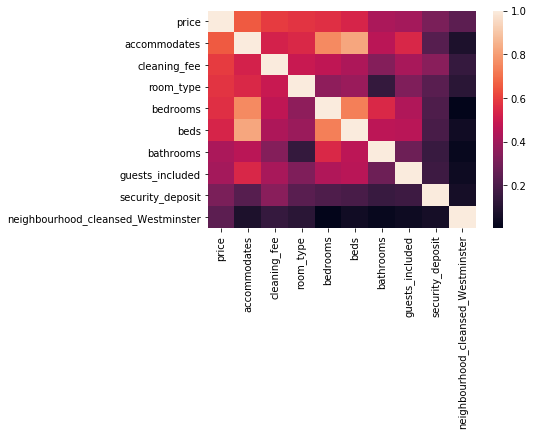

In [69]:
sns.heatmap(corr_df)

In [70]:
listings['price_pp'] = listings['price']/listings['accommodates']
listings.corr()['price_pp'].sort_values(ascending=False).head(10)

price_pp                                         1.000000
price                                            0.540417
room_type                                        0.231056
neighbourhood_cleansed_Westminster               0.225090
review_scores_location                           0.199188
cleaning_fee                                     0.195599
neighbourhood_cleansed_Kensington and Chelsea    0.189229
security_deposit                                 0.155541
new_zip_WC                                       0.147808
new_zip_W                                        0.146712
Name: price_pp, dtype: float64

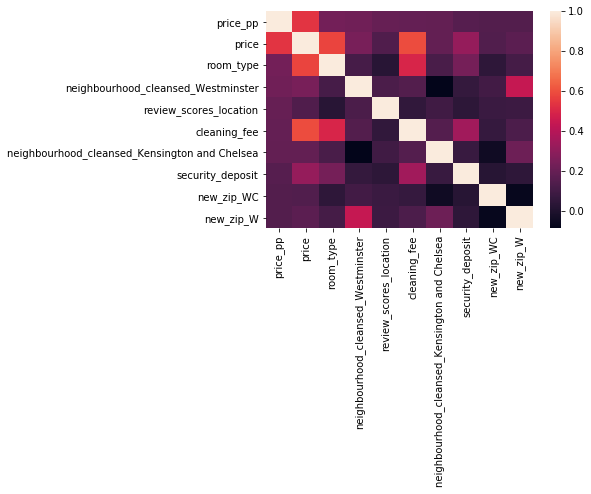

In [71]:
corr_df = listings[listings.corr()['price_pp'].sort_values(ascending=False).head(10).index].corr()
sns.heatmap(corr_df)

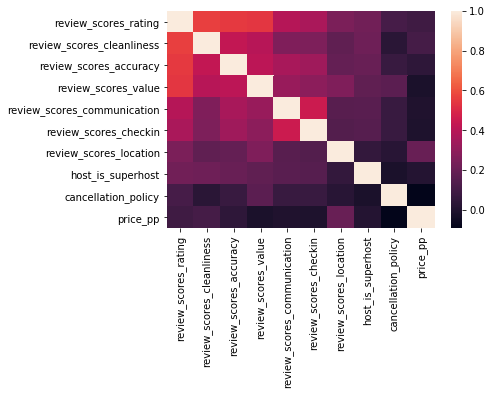

In [72]:
#Without any outliers the rating isnt dependant on any one individual skewing score and thus, other correlations are improved

corr_df = listings[listings.corr()['review_scores_rating'].sort_values(ascending=False).head(10).index].corr()
sns.heatmap(corr_df)

In [73]:
listings.to_csv('clean_listings.csv',index=None)

In [74]:
#Given that the price is highly tied to how many beds are present it is probably better to predict the price per person.
dfprice = listings.drop(columns=['price', 'accommodates'])

In [75]:
#Split out features and labels
X = dfprice.drop('price_pp',axis=1)
y= listings['price_pp']

In [76]:
#We will now scale the data
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = X.columns

In [77]:
#Splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [78]:
#Building and Implementing the model
mod = DecisionTreeRegressor(max_depth=8, min_samples_split=15, min_samples_leaf=8)
mod.fit(X_train,y_train)
mod.fit(X_train,y_train)
mod.score(X_train,y_train)

0.3633656098995513

In [79]:
#Comparing the absolute error for the price per person.
from sklearn import metrics
metrics.median_absolute_error(y_test, [y_test.mean()]*len(y_test))

10.02278454310786

In [80]:
#Median absolute error of the test predictions.
metrics.median_absolute_error(y_test, mod.predict(X_test))

7.820331428582598

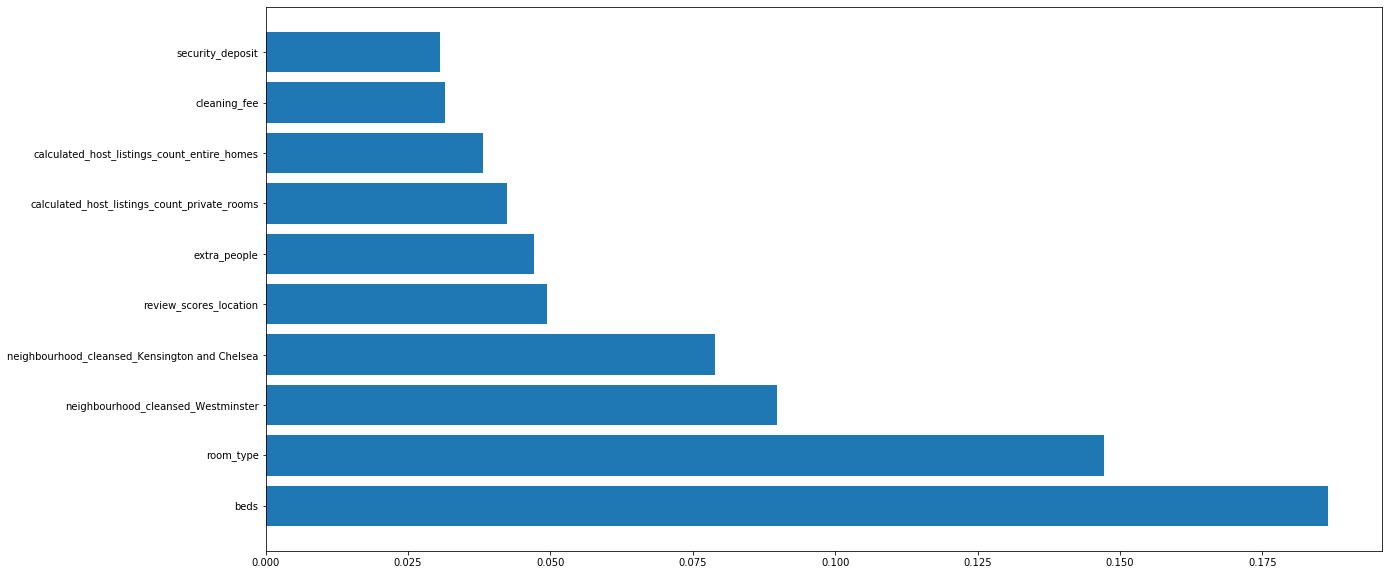

In [81]:
feat_imp = pd.DataFrame(mod.feature_importances_.transpose(), index=X_scaled.columns, columns=['imp'])
feat_imp = feat_imp.sort_values(by=['imp'],ascending=False).head(10)
plt.figure(figsize=(20,10))
plt.barh(feat_imp.index, feat_imp['imp'], )
plt.savefig('feat_imp_price')

In [82]:
listings = pd.read_csv('clean_listings.csv')

In [83]:
feat_imp

,imp
beds,0.186600
room_type,0.147176
neighbourhood_cleansed_Westminster,0.089750
neighbourhood_cleansed_Kensington and Chelsea,0.078875
review_scores_location,0.049468
extra_people,0.047094
calculated_host_listings_count_private_rooms,0.042390
calculated_host_listings_count_entire_homes,0.038101
cleaning_fee,0.031420
security_deposit,0.030675


In [84]:
#Split out features and labels
X = dfprice.drop('review_scores_rating',axis=1)
y= listings['review_scores_rating']

In [85]:
#Scaling the data
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = X.columns

In [86]:
#Splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [87]:
mod = DecisionTreeRegressor(max_depth=8, min_samples_split=15, min_samples_leaf=8)
mod.fit(X_train,y_train)
mod.fit(X_train,y_train)
mod.score(X_train,y_train)

0.5788886870908441

In [88]:
mod.score(X_test,y_test)

0.5260471088047352

In [89]:
metrics.median_absolute_error(y_test, [y_test.mean()]*len(y_test))

4.372877825226539

In [90]:
metrics.median_absolute_error(y_test, mod.predict(X_test))

1.5038179834813832

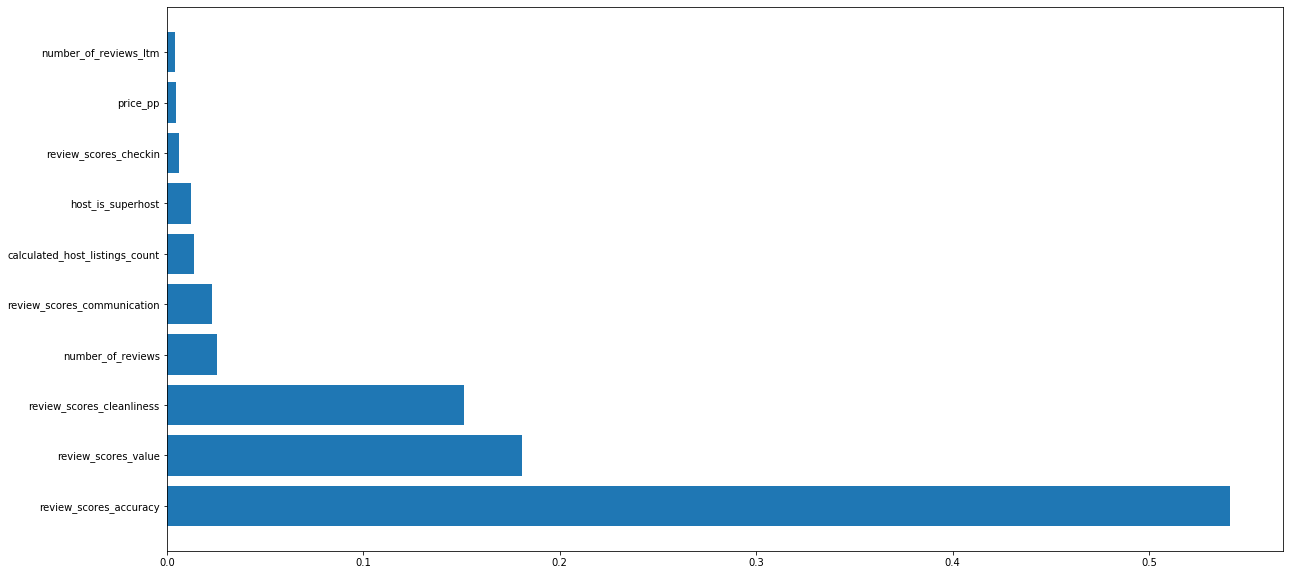

In [91]:
feat_imp = pd.DataFrame(mod.feature_importances_.transpose(), index=X_scaled.columns, columns=['imp'])
feat_imp = feat_imp.sort_values(by=['imp'],ascending=False).head(10)
plt.figure(figsize=(20,10))
plt.barh(feat_imp.index, feat_imp['imp'], )
plt.savefig('feat_imp_rev')

In [92]:
feat_imp

,imp
review_scores_accuracy,0.541069
review_scores_value,0.180747
review_scores_cleanliness,0.151411
number_of_reviews,0.025440
review_scores_communication,0.022895
calculated_host_listings_count,0.013586
host_is_superhost,0.012150
review_scores_checkin,0.005958
price_pp,0.004891
number_of_reviews_ltm,0.004036


In [93]:
y_test.max()

100.0

We can now take a look at what are the most popular description words are in from the dataset.

In [94]:
textdf['description']

0        My bright double bedroom with a large window h...
1        Lots of windows and light.  St Luke's Gardens ...
2        Open from June 2018 after a 3-year break, we a...
3        Artist house, bright high ceiling rooms, priva...
4        Large, all comforts, 2-bed flat; first floor; ...
5        Big room with double bed/ clean sheets/ clean ...
6        Contemporary design meets classic London in th...
7        Contemporary design meets classic London in th...
8        The name says it all, it really is a restful r...
9        Walking distance to Twickenham Stadium, 35 min...
10       Bright, large dbl room with a very high ceilin...
11       3 Bed House with garden close to Thames river ...
12       This room is located on the ground floor of th...
13       Situated literally in London Fields park and o...
15       The bright, light and stylish apartment in Can...
16       Our guest room & bathroom overlooks the garden...
17       A typical Victorian Terraces London house, col.

In [95]:
#Drop the null values
textdf.dropna(subset=['description'],inplace=True)

In [96]:
def string_clean(x):
    '''function takes a string x and returns only the text
    designed to be run with .apply
    
    returns string with punct removed
    '''
    #return re.sub(r"[^A-Za-z]+", '', x)
    return re.sub(r'[^\w\s]','',x)
   

textdf['new_desc'] = textdf['description'].apply(string_clean)
#listings.drop(columns=['zipcode'], inplace=True)

In [97]:
textdf['new_desc']

0        My bright double bedroom with a large window h...
1        Lots of windows and light  St Lukes Gardens ar...
2        Open from June 2018 after a 3year break we are...
3        Artist house bright high ceiling rooms private...
4        Large all comforts 2bed flat first floor lift ...
5        Big room with double bed clean sheets clean to...
6        Contemporary design meets classic London in th...
7        Contemporary design meets classic London in th...
8        The name says it all it really is a restful ro...
9        Walking distance to Twickenham Stadium 35 min ...
10       Bright large dbl room with a very high ceiling...
11       3 Bed House with garden close to Thames river ...
12       This room is located on the ground floor of th...
13       Situated literally in London Fields park and o...
15       The bright light and stylish apartment in Cana...
16       Our guest room  bathroom overlooks the garden ...
17       A typical Victorian Terraces London house colo.

In [98]:
#Get the common stopwords
swords = list(stopwords.words('english'))

In [99]:
#Getting a single joined list of all the words together
wcount = pd.Series(' '.join(textdf["new_desc"]).lower().split()).value_counts()

In [100]:
#Bool of whther the word is a stop word that could be refactored
log_assess = [x not in swords for x in wcount.index]

In [101]:
#Return the frequencies
freqs = wcount[log_assess]

In [102]:
#Creating a dictionary
d = freqs.to_dict()

In [103]:
from wordcloud import WordCloud

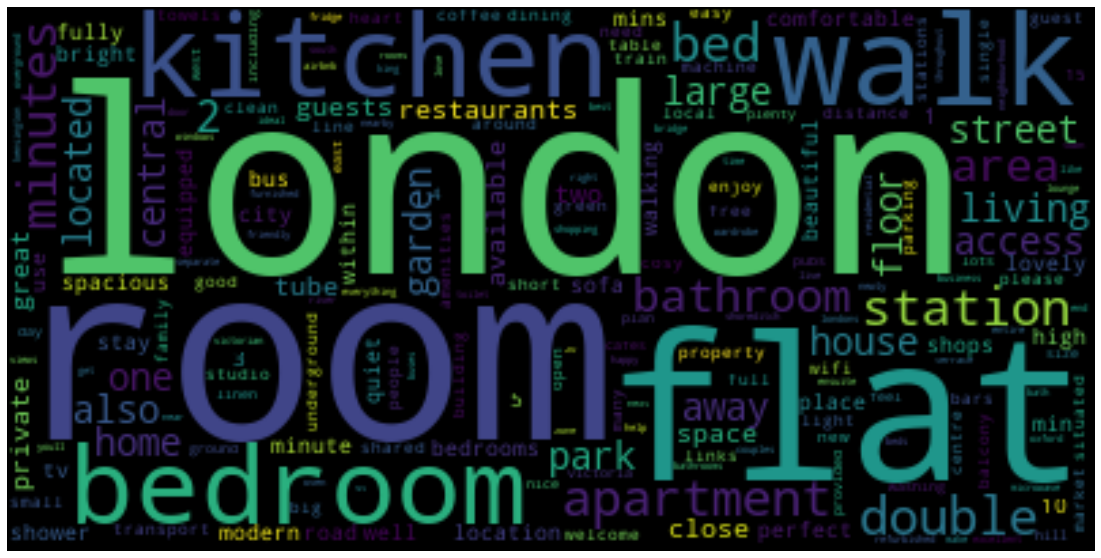

In [104]:
#Generating the wordcloud
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=d)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('wordcloud')
plt.show()